# Pima Indian Diabetes Dataset

# Content

 - [Imports](#Imports)
 - [Univariate Analysis](#Univariate-Analysis)
 - [Bivariate Analysis](#Bivariate-Analysis)
 - [Logistic Regression](#Logistic-Regression)
 - [Another Logistic Regression](#Another-Logistic-Regression)

# Imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
ls

adult_data/
adverse-food-events/
amazon-fine-food-reviews/
creditcard.csv*
data-science-for-good-kiva-crowdfunding/
diabetes.csv*
flavors_of_cacao.csv*
flipkart_com-ecommerce_sample.csv*
iris_folder/
kickstarter-projects/
powerlifting-database/
wine-reviews/
zecon/


In [59]:
diabetes = pd.read_csv('diabetes.csv')

In [60]:
diabetes.shape

(768, 9)

In [61]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


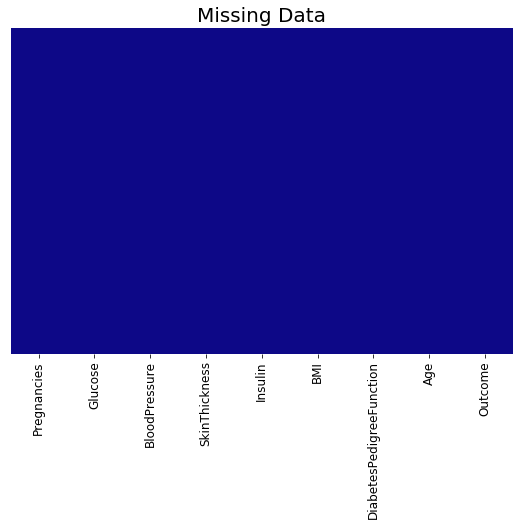

In [64]:
plt.figure(figsize=(9,6))
sns.heatmap(diabetes.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.title('Missing Data',fontsize=20)
plt.xticks(fontsize=12)
plt.show()

No visible null data in the heatmap.

In [65]:
diabetes.duplicated().value_counts()

False    768
dtype: int64

No duplicate data.

In [66]:
print('Number of zero values for pregnancies: ' + str(len(diabetes[diabetes['Pregnancies']==0])))
print('Number of zero values for glucose: ' + str(len(diabetes[diabetes['Glucose']==0])))
print('Number of zero values for BloodPressure: ' + str(len(diabetes[diabetes['BloodPressure']==0])))
print('Number of zero values for SkinThickness: ' + str(len(diabetes[diabetes['SkinThickness']==0])))
print('Number of zero values for Insulin: ' + str(len(diabetes[diabetes['Insulin']==0])))
print('Number of zero values for BMI: ' + str(len(diabetes[diabetes['BMI']==0])))

Number of zero values for pregnancies: 111
Number of zero values for glucose: 5
Number of zero values for BloodPressure: 35
Number of zero values for SkinThickness: 227
Number of zero values for Insulin: 374
Number of zero values for BMI: 11


First off, I am not a doctor. My opinion on the following might be a bit ignorant. However, I have a hard time understanding the minimum Glucose, BloodPressure, SkinThickness, Insulin and BMI all to be 0. I suspect that some of these measurements may not be 100% accurate. Pregnancies is hard to read. Not sure if a zero is a real zero, or a bad entry.

# Univariate Analysis

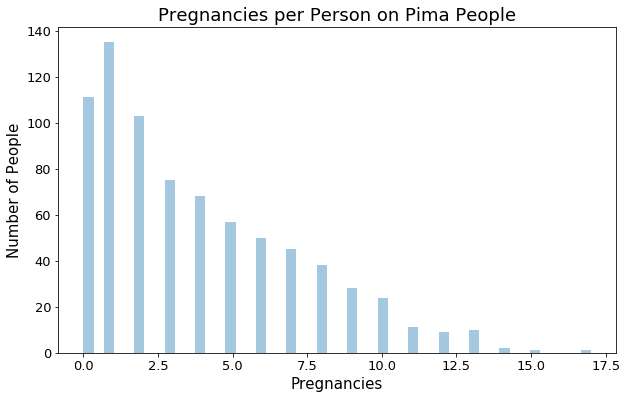

In [67]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['Pregnancies'],kde=False,bins=50)
plt.title('Pregnancies per Person on Pima People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Pregnancies',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

In [68]:
print('Average amount of children had by a Pima woman: ' + str(diabetes['Pregnancies'].mean()))

Average amount of children had by a Pima woman: 3.8450520833333335


Some of the Pima women are having a lot of children. 

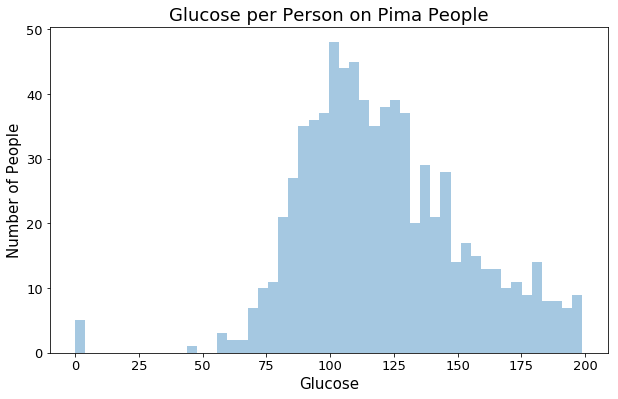

In [69]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['Glucose'],kde=False,bins=50)
plt.title('Glucose per Person on Pima People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Glucose',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

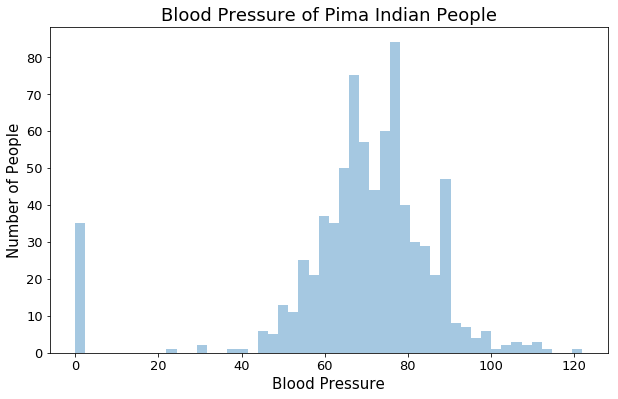

In [70]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['BloodPressure'],kde=False,bins=50)
plt.title('Blood Pressure of Pima Indian People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Blood Pressure',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

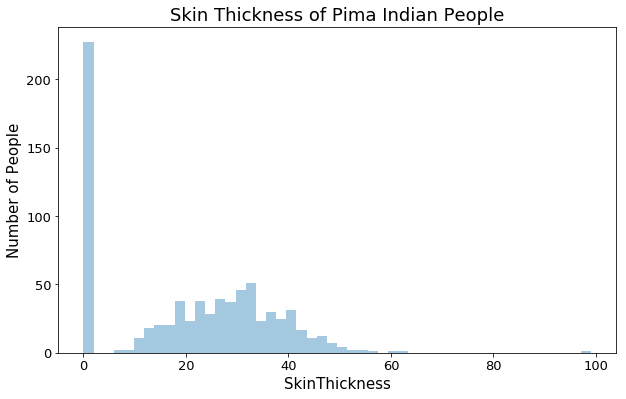

In [71]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['SkinThickness'],kde=False,bins=50)
plt.title('Skin Thickness of Pima Indian People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('SkinThickness',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

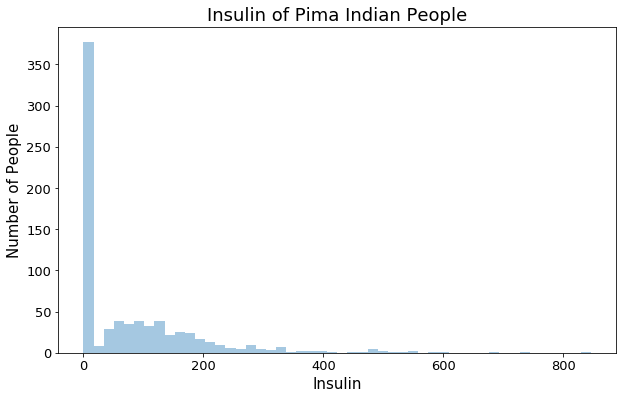

In [72]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['Insulin'],kde=False,bins=50)
plt.title('Insulin of Pima Indian People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Insulin',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

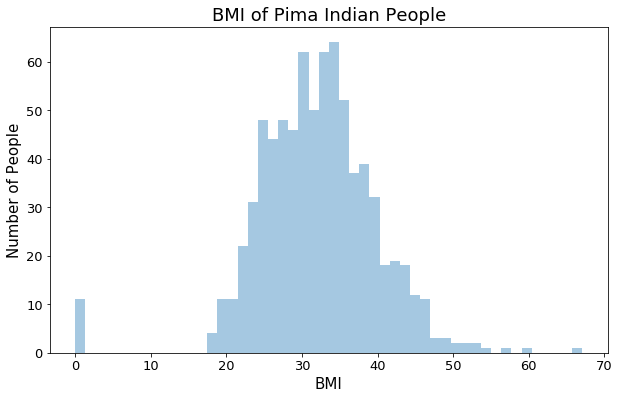

Average BMI of a Pima Person: 31.992578124999977


In [73]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['BMI'],kde=False,bins=50)
plt.title('BMI of Pima Indian People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('BMI',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()
print('Average BMI of a Pima Person: ' + str(diabetes['BMI'].mean()))

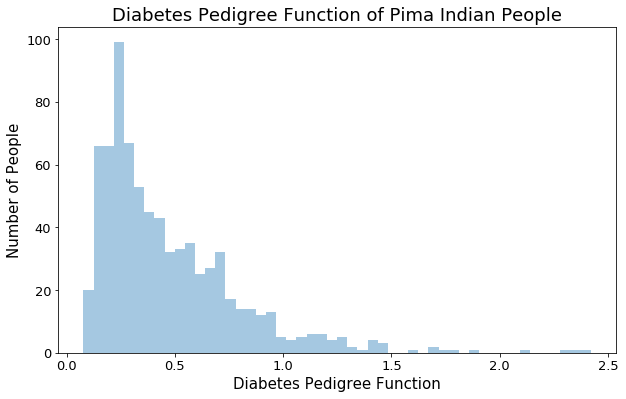

In [74]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['DiabetesPedigreeFunction'],kde=False,bins=50)
plt.title('Diabetes Pedigree Function of Pima Indian People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Diabetes Pedigree Function',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

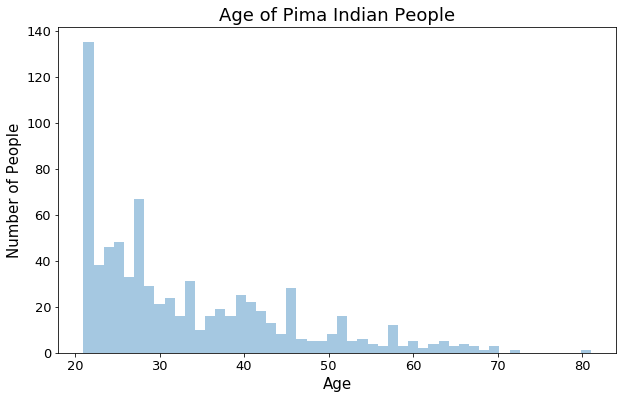

In [75]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes['Age'],kde=False,bins=50)
plt.title('Age of Pima Indian People',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()

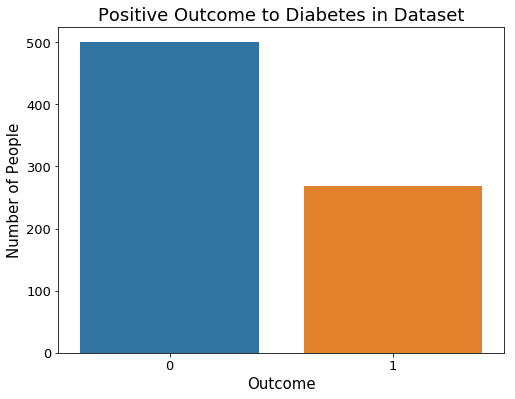

Ratio of Population with Diabetes: 0.3489583333333333


In [76]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome',data=diabetes)
plt.title('Positive Outcome to Diabetes in Dataset',fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Outcome',fontsize=15)
plt.ylabel('Number of People',fontsize=15)
plt.show()
print('Ratio of Population with Diabetes: ' + str(len(diabetes[diabetes['Outcome']==1])/len(diabetes)))

# Bivariate Analysis

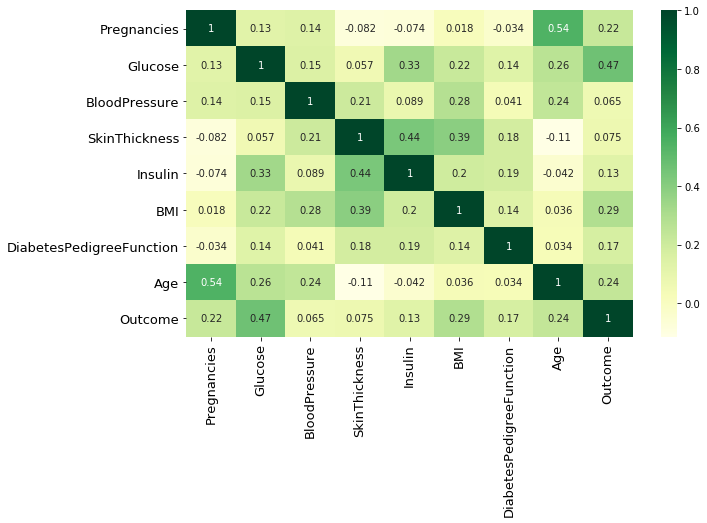

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(diabetes.corr(),cmap='YlGn',annot=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

The label is Outcome. Seems that Pregnancies, Glucose, BMI and Age all have some correlation. Let's explore those columns a bit more!

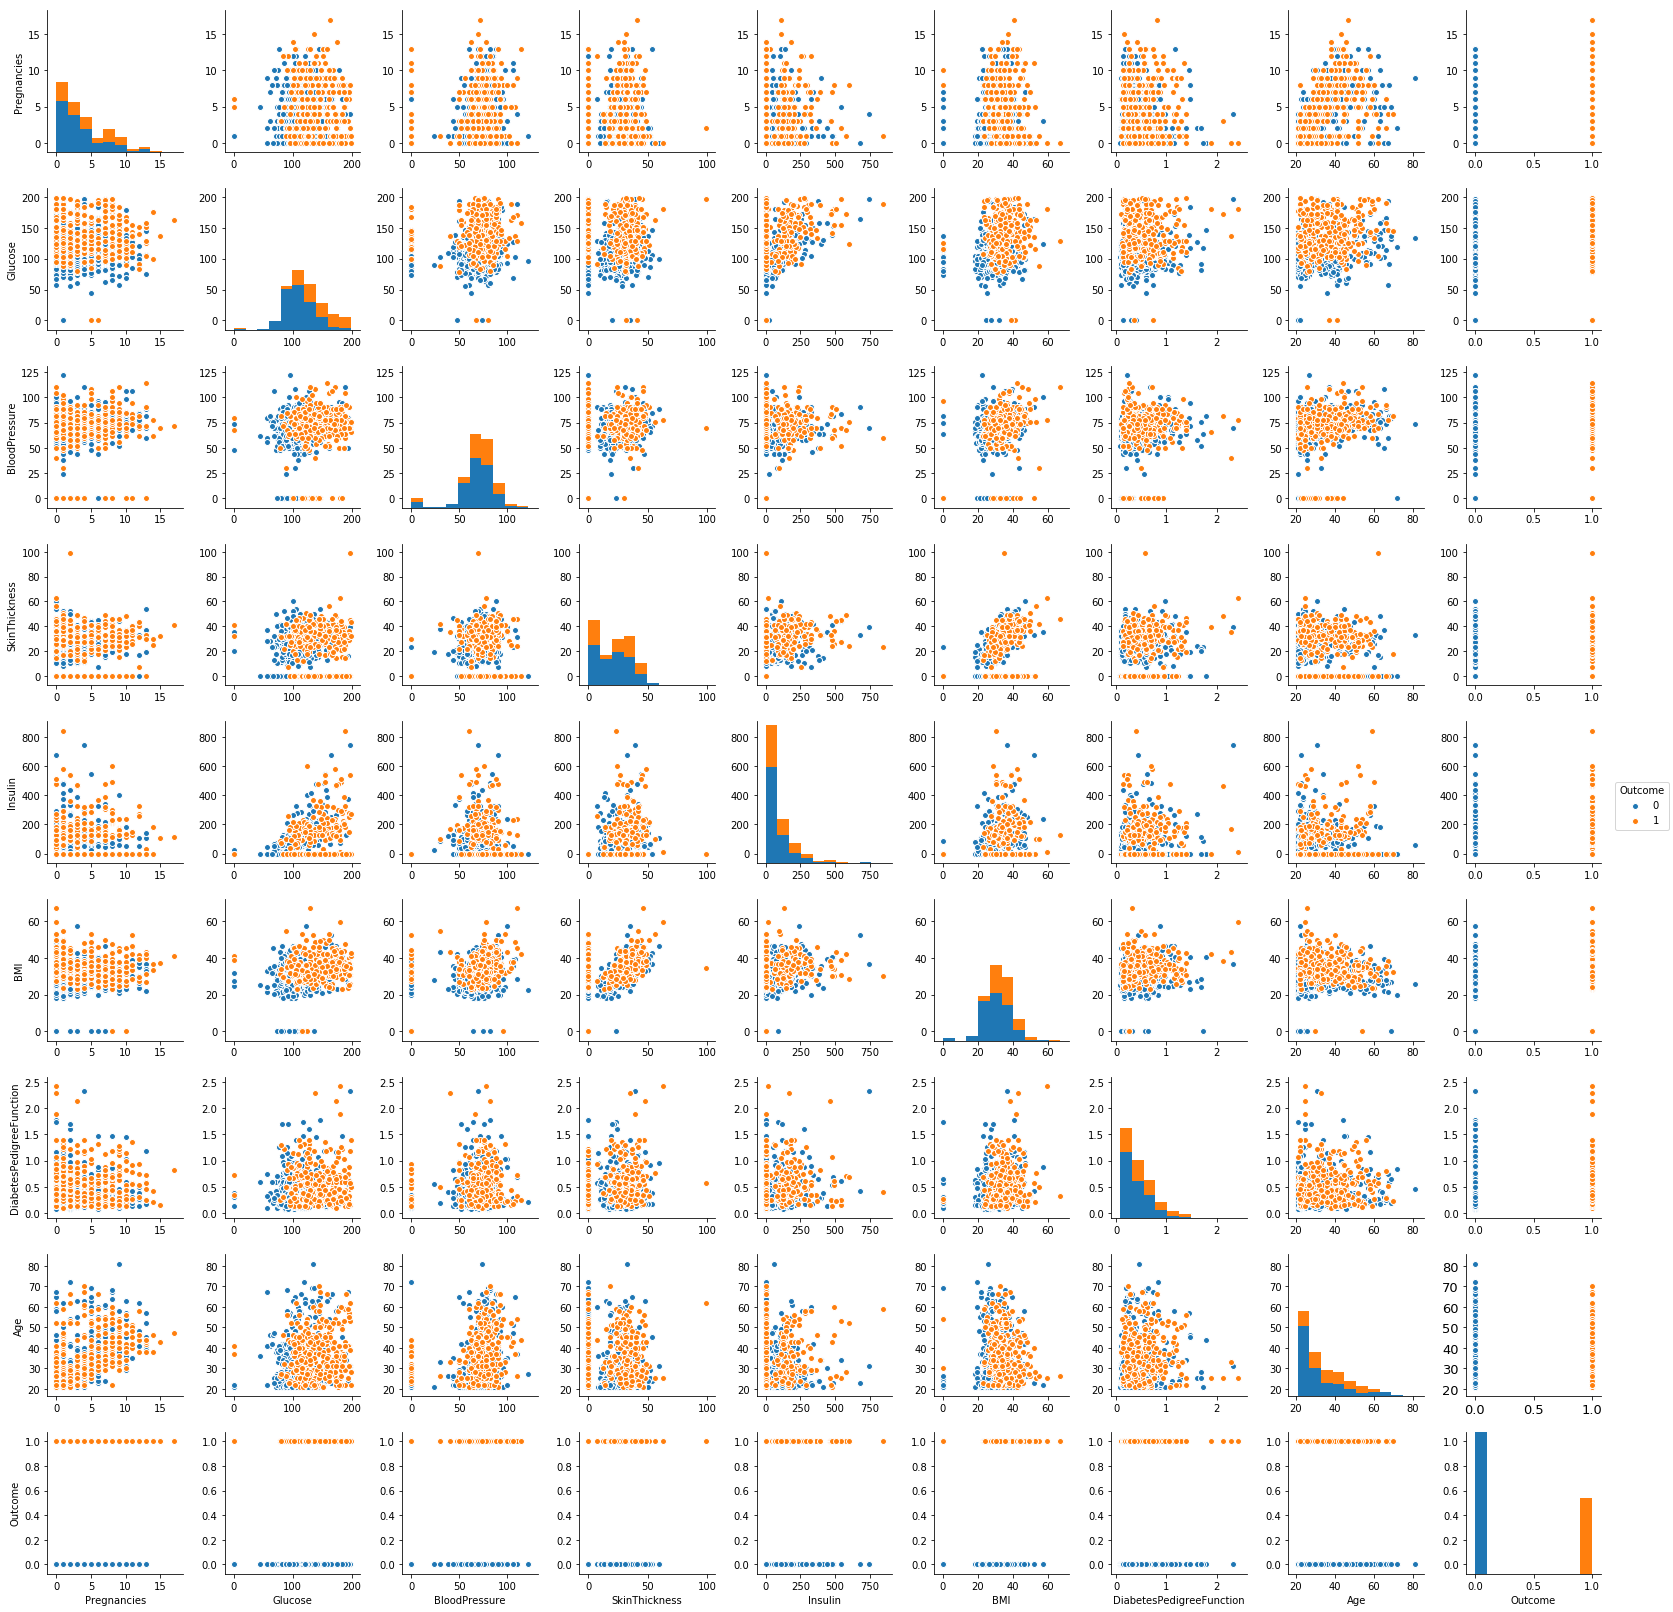

In [78]:
sns.pairplot(diabetes,hue='Outcome')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

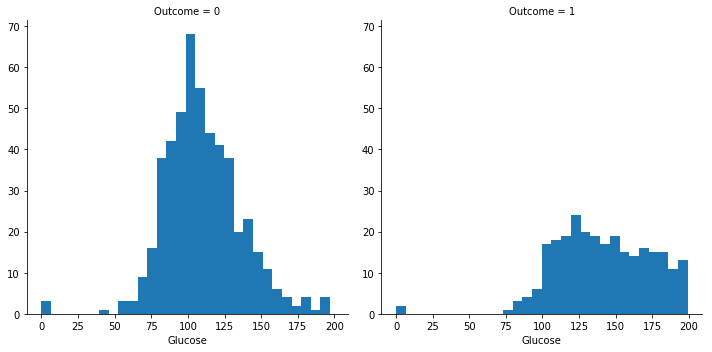

In [79]:
g = sns.FacetGrid(diabetes, col="Outcome",size=5)
g = g.map(plt.hist, "Glucose",bins=30)

Interesting. There is a normal looking population for Pima women without diabetes and their glucose levels. The population with diabetes have a different story to tell. The population with diabetes looks to have higher glucose levels.

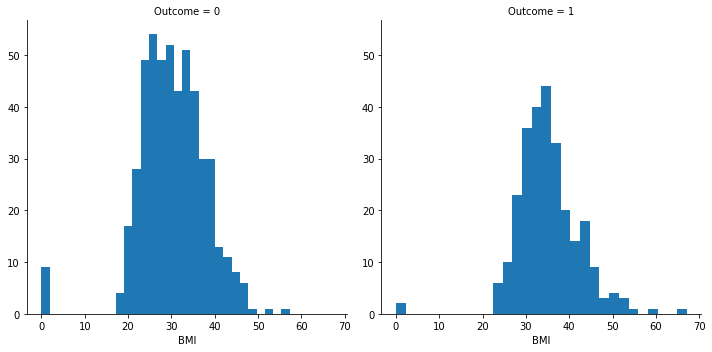

In [80]:
g = sns.FacetGrid(diabetes, col="Outcome",size=5)
g = g.map(plt.hist, "BMI",bins=30)

Both BMI readings for people with and without diabetes seem to have normal distributions. BMI of people with diabetes looks to be a little higher though.

In [81]:
print('Average Body Mass Index of a Pima woman without diabetes: ' + str(diabetes[diabetes['Outcome']==0]['BMI'].mean()))
print('Average Body Mass Index of a Pima woman with diabetes: ' + str(diabetes[diabetes['Outcome']==1]['BMI'].mean()))

Average Body Mass Index of a Pima woman without diabetes: 30.30419999999996
Average Body Mass Index of a Pima woman with diabetes: 35.14253731343278


There is no doubt that the population of Pima women are overweight. However, the population with diabetes is even more so. 

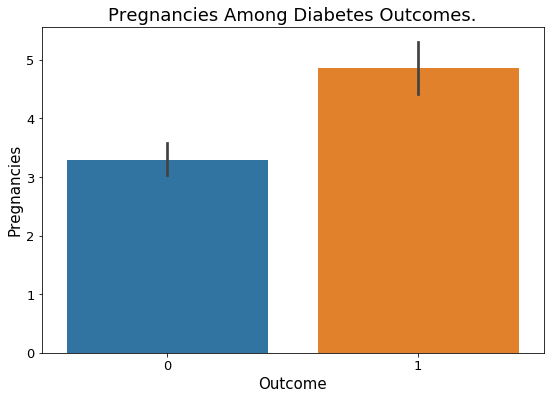

In [82]:
plt.figure(figsize=(9,6))
sns.barplot(data=diabetes,x='Outcome',y='Pregnancies')
plt.title('Pregnancies Among Diabetes Outcomes.',fontsize=18)
plt.xlabel('Outcome',fontsize=15)
plt.ylabel('Pregnancies',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

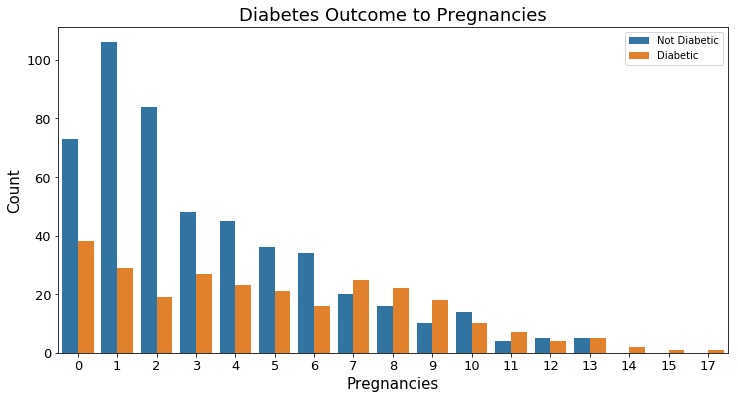

Average number of pregnancies for positive outcomes: 4.865671641791045
Average number of pregnancies for negative outcomes: 3.298


In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x='Pregnancies',data=diabetes,hue='Outcome')
plt.title('Diabetes Outcome to Pregnancies',fontsize=18)
plt.xlabel('Pregnancies',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(('Not Diabetic','Diabetic'),loc=1)
plt.show()
print('Average number of pregnancies for positive outcomes: ' + str(diabetes[diabetes['Outcome']==1]['Pregnancies'].mean()))
print('Average number of pregnancies for negative outcomes: ' + str(diabetes[diabetes['Outcome']==0]['Pregnancies'].mean()))

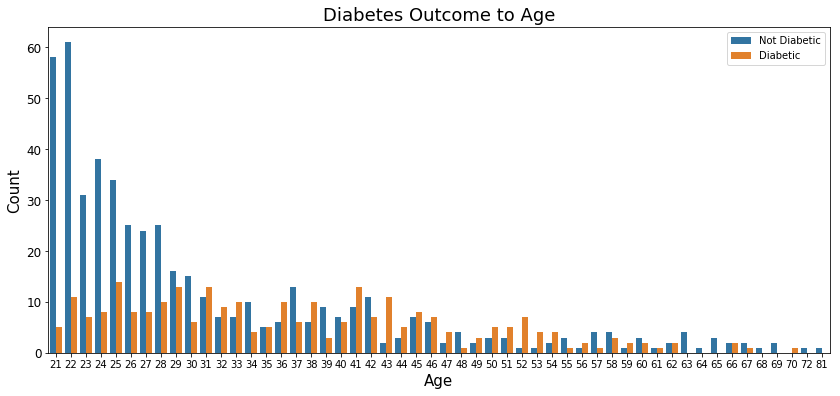

In [84]:
plt.figure(figsize=(14,6))
sns.countplot(x='Age',data=diabetes,hue='Outcome')
plt.title('Diabetes Outcome to Age',fontsize=18)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.legend(('Not Diabetic','Diabetic'),loc=1)
plt.show()

# Logistic Regression

I will use the Logistic Regression classifier given that our label (Outcome) is a qualitative variable. Though there are many other classifiers, I will use this one in this notebook. 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

First, let's try a Logistic Regression with Outcome as the label, and the rest of the columns as the feature data.

In [86]:
X = diabetes.drop(['Outcome'],axis=1)

In [87]:
y = diabetes['Outcome']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [89]:
lr = LogisticRegression()

In [90]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
pred = lr.predict(X_test)

In [92]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       167
          1       0.73      0.59      0.65        87

avg / total       0.78      0.78      0.78       254



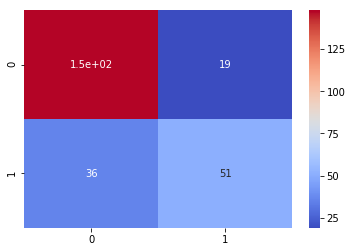

In [93]:
label = ['0','1']
sns.heatmap(confusion_matrix(y_test,pred),annot=True,xticklabels=label,yticklabels=label,cmap='coolwarm')

 # Another Logistic Regression

Now let's shoot for doing the same logistic regression minus the Insulin and SkinThickness columns (those columns had a lot of zero values.)

In [94]:
X = diabetes.drop(['Outcome','Insulin','SkinThickness'],axis=1)

In [95]:
y = diabetes['Outcome']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [97]:
lr = LogisticRegression()

In [98]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
prediction = lr.predict(X_test)

In [100]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       167
          1       0.67      0.59      0.63        87

avg / total       0.75      0.76      0.76       254



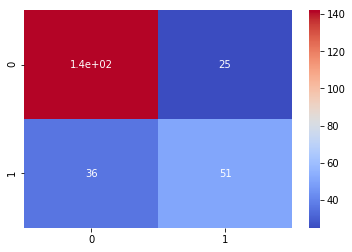

In [101]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,xticklabels=label,yticklabels=label,cmap='coolwarm')

# Thanks for looking. Feedback is appreciated!